# Transformation of random variables

In this section, we work with a simple strategy to generate random samples from a uniform (0,1) distribution.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import rand, seed

In [2]:
%config InlineBackend.figure_format = "retina"

## A first example

Let $f_Y(y) = \lambda \exp(-\lambda y)$ be the pdf of a random variable with $\text{dom}(y) = [0, \infty)$. The CDF of the random variable is given by

$$
    F_Y(y) = \int_{0}^y f_Y(y) = 1 - \exp(-\lambda y)
$$

If $x\sim U(0,1)$, we get

$$
\begin{align*}
    x &= 1 - \exp(-\lambda y)\\
    \iff y &= \frac{1}{\lambda}\log(1-x)
\end{align*}
$$

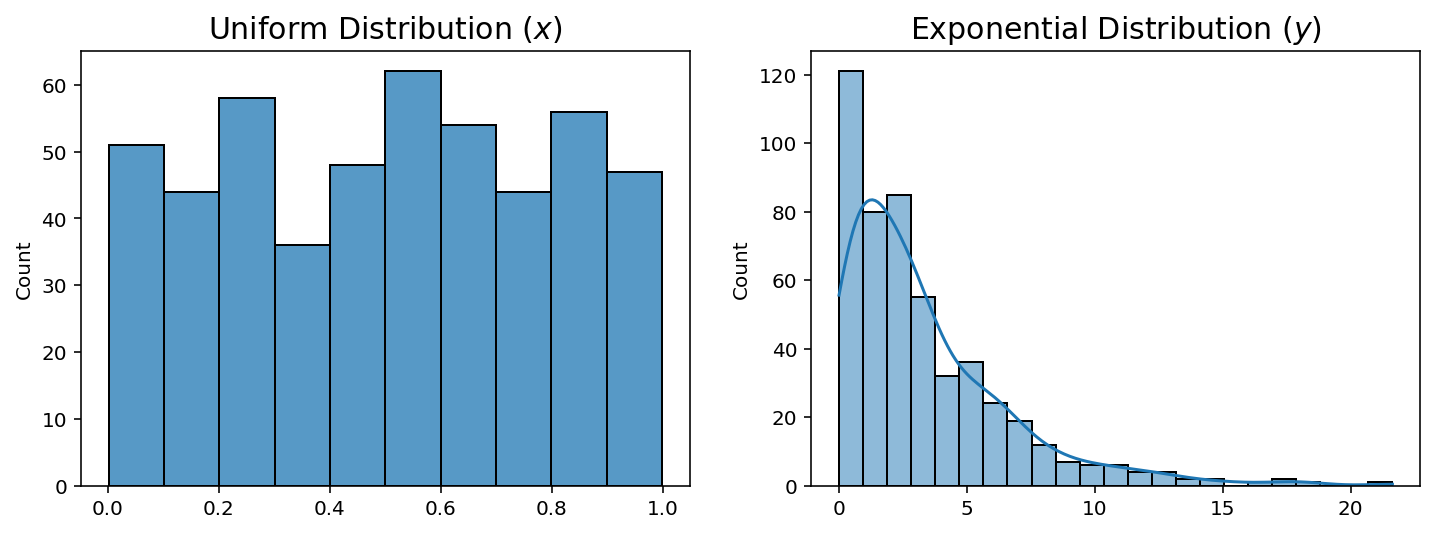

In [3]:
seed(314)
z = rand(500)
lam = 0.3
y = - np.log(1 - z) / lam

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(z, ax=ax[0])
sns.histplot(y, kde=True, ax=ax[1]);
ax[0].set_title("Uniform Distribution ($x$)", fontsize=15)
ax[1].set_title("Exponential Distribution $(y)$", fontsize=15);

## Box-Muller Method

The Box-Muller transformation seeks to transform a pair of uniformly-distributed random variables into a pair of indepently distributed gaussians with mean 0 and standard deviation of 1.

More formally, for uniformly distributed random variables $u_1, u_2 \sim U[0, 1]$. If we consider the transformation

$$
\begin{align*}
    z_1 = \sqrt{-2\log u_1} \cos(2\pi u_2)\\
    z_2 = \sqrt{-2\log u_1} \sin(2\pi u_2)\\
\end{align*}
$$

In [4]:
def box_muller(U):
    u1, u2 = U
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2

In [5]:
N = 10_000
U = rand(N, 2)
Z = np.apply_along_axis(box_muller, 1, U)

mu, sigma = 0, 1
Z = mu + sigma * Z

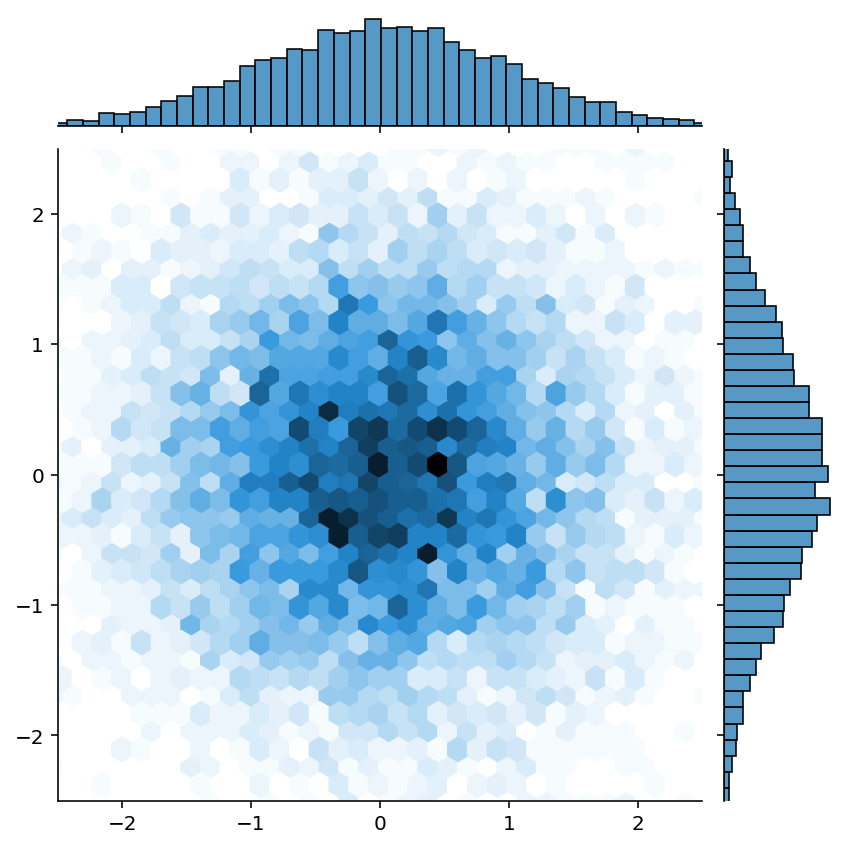

In [6]:
sns.jointplot(x=Z[:, 0], y=Z[:, 1], kind="hex",
              xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))